# [컨베이어 벨트 위의 로봇](https://www.acmicpc.net/problem/20055)

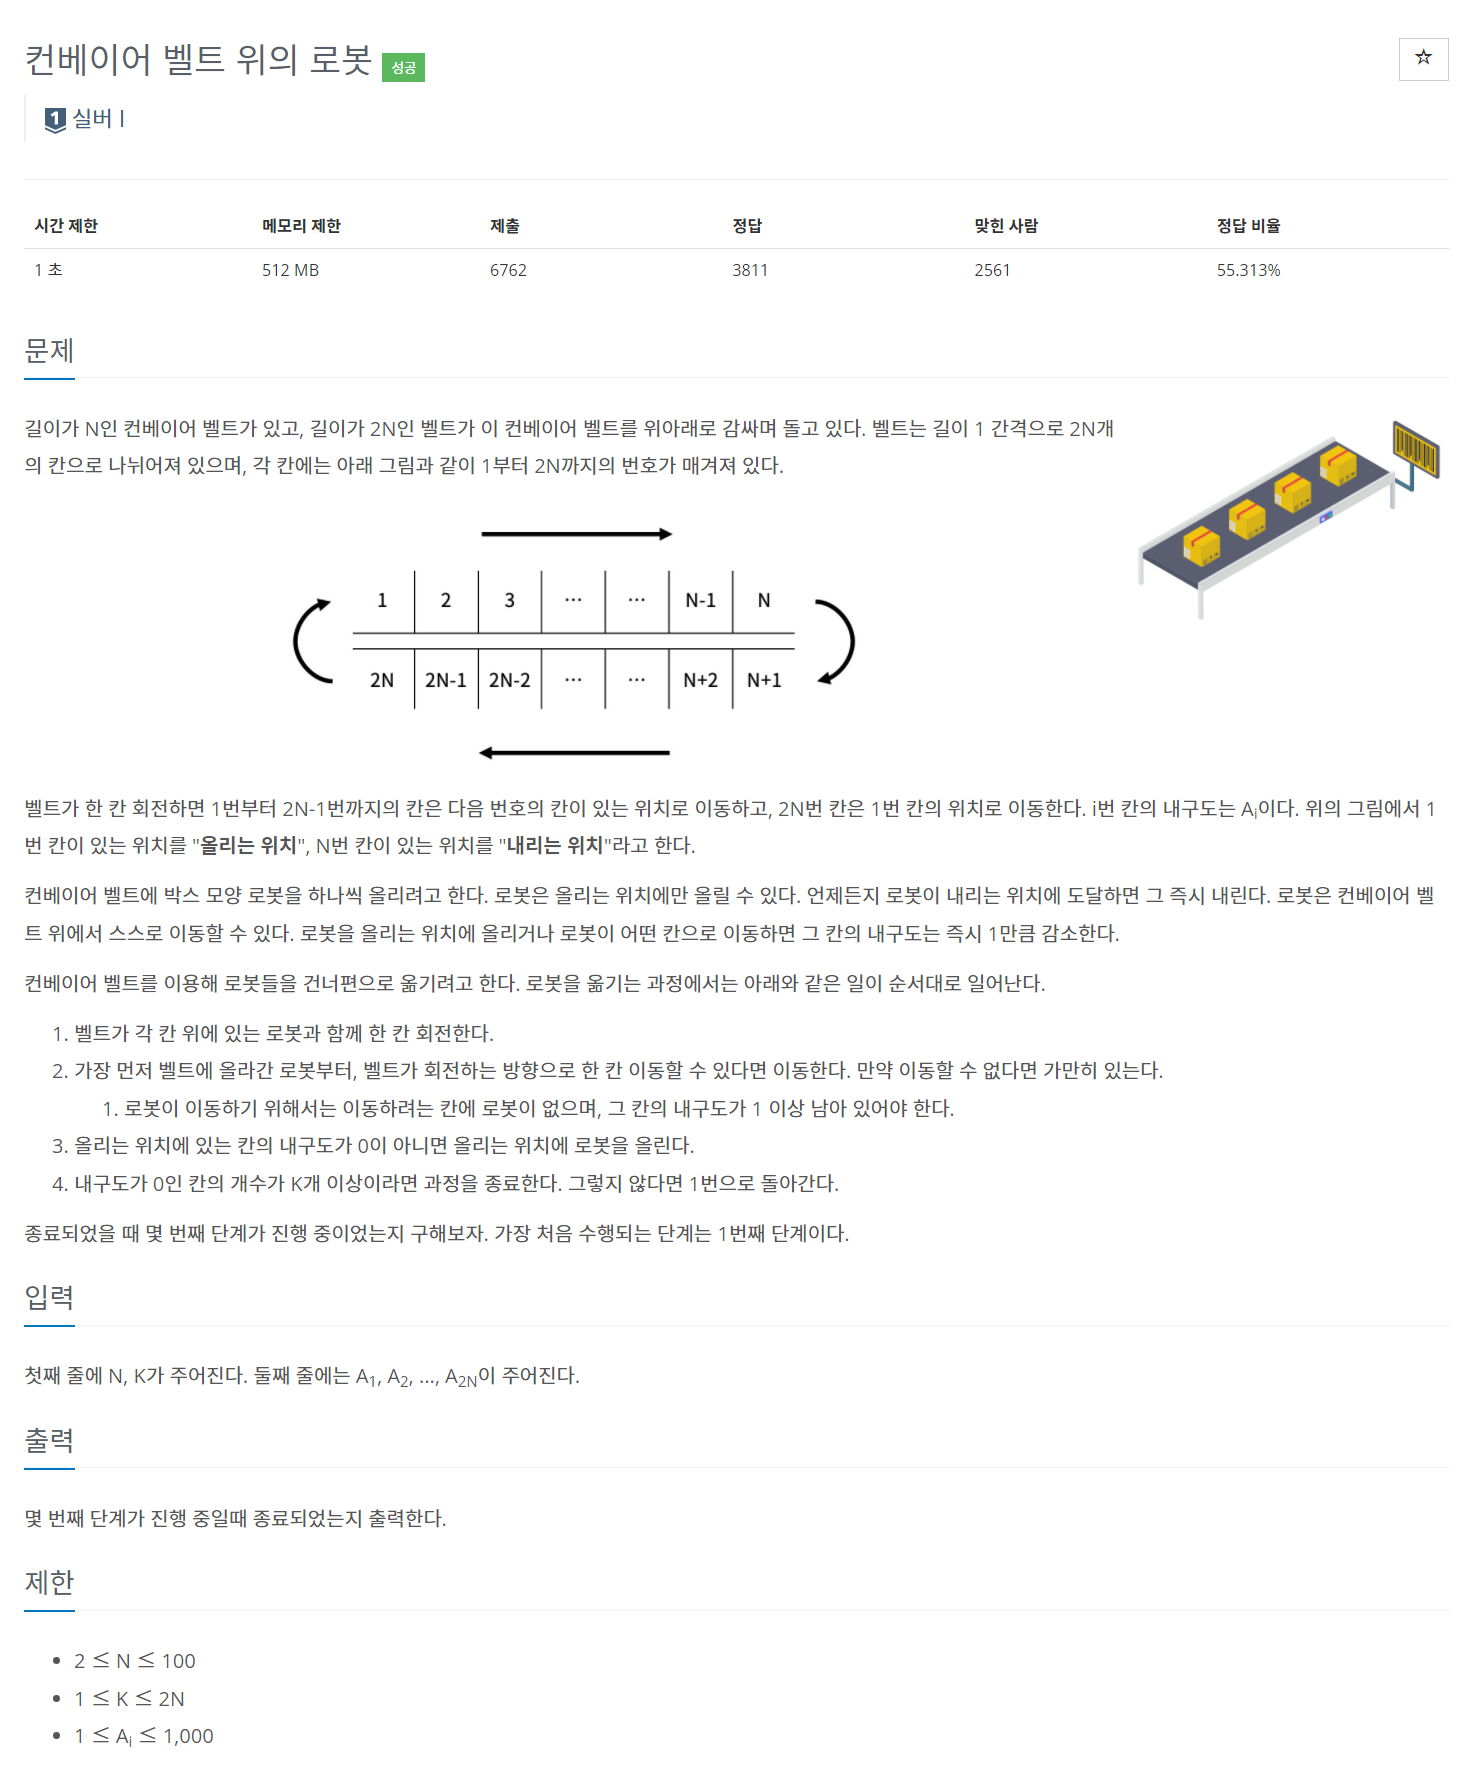

# 주석으로 설명 가능하므로 그림 없음

In [ ]:
from collections import deque
import sys

In [ ]:
def belt_move():  # 내구도에 영향 안 끼침
    temp = arr[-1]
    for i in range(2*n-1, 0, -1):
        arr[i] = arr[i-1]
    arr[0] = temp
    elm = False
    if len(robot) != 0:  # 벨트 위 로봇 수송
        for i in range(len(robot)):
            visit[robot[i]] = False
            robot[i] += 1
            if robot[i] == n-1:
                elm = True
                continue
            visit[robot[i]] = True
    if elm:
        robot.popleft()

def robot_move():  # 내구도에 영향을 줌
    global num
    elm = False
    for i, now in enumerate(robot):
        next = now + 1
        if arr[next] != 0 and not visit[next]:
            robot[i] += 1
            visit[now] = False
            visit[next] = True
            arr[next] -= 1
            if arr[next] == 0: # 내구도가 0이 됐다면 개수에 더해줌
                num += 1
            if next == n-1:
                visit[next] = False
                elm = True
    if elm:
        robot.popleft()


def robot_add():
    global num
    if arr[0] != 0:
        robot.append(0)
        visit[0] = True
        arr[0] -= 1
        if arr[0] == 0: # 내구도가 0이 됐다면 개수에 더해줌
            num += 1


def check(num):
    if num >= k:
        return True
    return False

input = sys.stdin.readline

n, k = map(int, input().split())
arr = list(map(int, input().split()))

# 내구도가 0인 칸의 개수
num = 0
# 현재 로봇의 위치
robot = deque()
visit = [False]*(n)

# 단계 진행횟수
cnt = 0
while True:
    cnt += 1
    belt_move()
    robot_move()
    robot_add()
    if check(num):
        break

print(cnt)